In [1]:
import numpy as np
import pandas as pd
import altair as alt
import bokeh.plotting
import bokeh.io
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

 # Problem 1.1

## Samantha D'Costa

My goals for this class are for me to be able to understand some of the statistical models that are applied to data. I would also like at the end of the class like to be confident in data analysis, so that I can just be given a set of data and be able to investigate it and reach some conclusion about the correlations in the data. Ultimately, my goal is to get to experience what it is like to be a data scientist or data analyst.

Even though, I am probably going to work as a software engineer, when I graduate Caltech, I want to have a job that works with data, specifically either data pipelines or analysis. I believe that I will use the skills I learn in this class in my future to help me deal with large amounts of data and to be able to find insights about the data I am given. I believe the skills from this class will help me become a better software engineer or data engineer and achieve my goal of working with data in my future jobs.

I would like to learn cloud computing concepts with dealing with large data sets. Also, I would like to use one big data storage device, such as AWS or Spark, to get exposure to working with big data. I would like to get help understanding some of the statistical models that we will use in this class because I struggled in Ma 3 with some of the statistical models we employed.

## Grace Peng

My goal for this class, as a computer science major, is to learn more about what concepts and aspects computer science and biological data analysis share, in terms of gaining the ability to organize and present data in a proper, intuitive manner. This skill is a versatile asset, and having worked at a data visualization company the past couple of summers, I find it worthwhile to learn more about the unique ways that analysis techniques can help illuminate insights into large data sets, and how that can apply to biology specifically. I’m excited to learn about the intersection of coding and data analysis in biology.  

I expect to use the skills I learn a lot, as data analysis is highly sought after in both industry and academia. Data is everywhere and serves as the basis of solving a lot of problems, so whatever I end up doing in my career, analyzing data will always be a critical skill. Companies have tons of collected data to sort through, and they need people to be able to produce useful insights and to find underlying patterns within that data, otherwise all of it becomes useless. Machine learning, an area of computer science that I’m interested in, also relies heavily on being able to work with and make sense of large data sets. 

I’m interested in learning more about the methods of data analysis and how I can use computer science techniques to aid in analysis, and also some of the mathematical foundation behind analyzing data. There’s nothing specifically that I’m confused about so far.

## Jieni Li

My goal for this class is to 1) get familiar with data storage, processing, and visualization tools, 2) see interesting topics in biological research, and 3) learn about the approaches of making statistical inferences from data.

As a CS major, I am interested in working with data science. In industry where there are heaps of data, I would like to apply the intuition and practices I learn in this class, and know what directions to go in order to find insights. For example, know what attributes are important before shoving everything into a neural net.

I would like to learn how to deal with giant datasets with limited computational resources.


 # Problem 1.2.a

In [2]:
# Read on the data from the csv file to a pandas data frame and make sure to only read in the data and not the comments as well
df = pd.read_csv("../data/ant_joint_locations.zip", comment ="#") 

In [3]:
# Translate the x and y coordinates to distances in millimeters
df['x (mm)'] = df['x_coord'] * .08 # Add a column for x_coordinates
df['y (mm)'] = df['y_coord'] * .08 # Add a column for y_coordinates


In [4]:
df.head() # Display the data frame with the two new columns ( 'x (mm)' and 'y (mm)')

,frame,beetle_treatment,ID,bodypart,x_coord,y_coord,likelihood,x (mm),y (mm)
0,0,dalotia,0,head,73.086,193.835,1.0,5.84688,15.50680
1,1,dalotia,0,head,73.730,194.385,1.0,5.89840,15.55080
2,2,dalotia,0,head,75.673,195.182,1.0,6.05384,15.61456
3,3,dalotia,0,head,77.319,196.582,1.0,6.18552,15.72656
4,4,dalotia,0,head,78.128,197.891,1.0,6.25024,15.83128


 # Problem 1.2.b

## Plots of the cumulative distance traveled by each ant, grouped by the beetle treatment

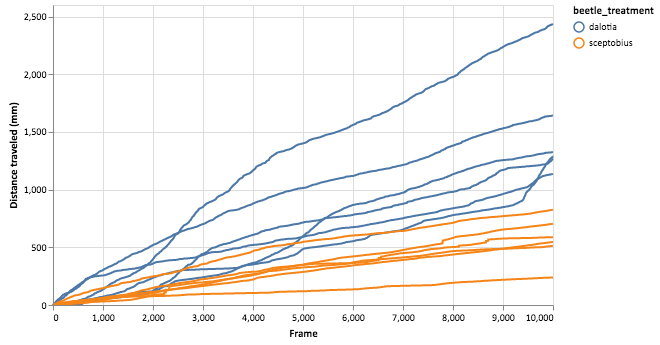

In [5]:
# List of new data frames for distance traveled
dist_dfs = []

# Loop through all ants we have
for ant_id in range(12):
    
    # Take the rows related to this ant's thorax
    ant_df = df.loc[(df['ID'] == ant_id) & (df['bodypart'] == 'thorax')]
    
    # Initialize
    prev_x = -1
    prev_y = -1
    distance = 0 # cumulative distance
    dist_list = []
    
    # For every frame, compute distance traveled from previous frame
    for row_index, row in ant_df.iterrows():
        x = row['x (mm)']
        y = row['y (mm)']
        frame = row['frame']
        if prev_x >= 0:
            delta_x = x - prev_x
            delta_y = y - prev_y
            distance += np.sqrt(delta_x ** 2 + delta_y ** 2)
        dist_list.append(distance)
        prev_x = x
        prev_y = y
    
    # Make a new data frame and add to the list
    dist_df = pd.DataFrame({
        'ID': row['ID'],
        'beetle_treatment': row['beetle_treatment'],
        'frame': range(len(dist_list)),
        'distance': dist_list
    })
    dist_dfs.append(dist_df)

# Plot the distance traveled 
charts = []
for dist_df in dist_dfs:
    charts.append(alt.Chart(
        dist_df,
        height=300,
        width=500
    ).mark_line(
    ).encode(
        x=alt.X('frame:Q', title='Frame'),
        y=alt.Y('distance:Q', title='Distance traveled (mm)'),
        color='beetle_treatment:N'
    ))
alt.layer(*charts)

## Plots of actual positions of the ants on the arenas

In [9]:
part_0 = (df['bodypart'] == 'thorax') & (df['ID'] == 0) # Grab the coordinates for the thorax of the beetle with ID 0, which is dalotia
part_0 = df.loc[part_0, :] # Only display some of the data ######Remove this later ########
part_1 = (df['bodypart'] == 'thorax') & (df['ID'] == 1) # Grab the coordinates for the thorax of the beetle with ID 1, which is dalotia
part_1 = df.loc[part_1, :] # Only display some of the data ######Remove this later ########
part_2 = (df['bodypart'] == 'thorax') & (df['ID'] == 2) # Grab the coordinates for the thorax of the beetle with ID 2, which is dalotia
part_2 = df.loc[part_2, :] # Only display some of the data ######Remove this later ########
part_3 = (df['bodypart'] == 'thorax') & (df['ID'] == 3) # Grab the coordinates for the thorax of the beetle with ID 3, which is dalotia
part_3 = df.loc[part_3, :] # Only display some of the data ######Remove this later ########
part_4 = (df['bodypart'] == 'thorax') & (df['ID'] == 4) # Grab the coordinates for the thorax of the beetle with ID 4, which is dalotia
part_4 = df.loc[part_4, :] # Only display some of the data ######Remove this later ########
part_5 = (df['bodypart'] == 'thorax') & (df['ID'] == 5) # Grab the coordinates for the thorax of the beetle with ID 5, which is dalotia
part_5 = df.loc[part_5, :] # Only display some of the data ######Remove this later ########
part_6 = (df['bodypart'] == 'thorax') & (df['ID'] == 6) # Grab the coordinates for the thorax of the beetle with ID 6, which is sceptobius
part_6 = df.loc[part_6, :] # Only display some of the data ######Remove this later ########
part_7 = (df['bodypart'] == 'thorax') & (df['ID'] == 7) # Grab the coordinates for the thorax of the beetle with ID 7, which is sceptobius
part_7 = df.loc[part_7, :] # Only display some of the data ######Remove this later ########
part_8 = (df['bodypart'] == 'thorax') & (df['ID'] == 8) # Grab the coordinates for the thorax of the beetle with ID 8, which is sceptobius
part_8 = df.loc[part_8, :] # Only display some of the data ######Remove this later ########
part_9 = (df['bodypart'] == 'thorax') & (df['ID'] == 9) # Grab the coordinates for the thorax of the beetle with ID 9, which is sceptobius
part_9 = df.loc[part_9, :] # Only display some of the data ######Remove this later ########
part_10 = (df['bodypart'] == 'thorax') & (df['ID'] == 10) # Grab the coordinates for the thorax of the beetle with ID 10, which is sceptobius
part_10 = df.loc[part_10, :] # Only display some of the data ######Remove this later ########
part_11 = (df['bodypart'] == 'thorax') & (df['ID'] == 11) # Grab the coordinates for the thorax of the beetle with ID 11, which is sceptobius
part_11 = df.loc[part_11, :] # Only display some of the data ######Remove this later ########

### Plots displaying the recorded positions (x,y) of the thorax of an ant placed with a Dalotia beetle (Ant IDs 0-5) and an ant placed with Sceptobius beetle ( Ant IDs 6-11)

         Ants placed with Dalotia Beetle               Ants placed with Sceptobius Beetle
         _______________________________               __________________________________


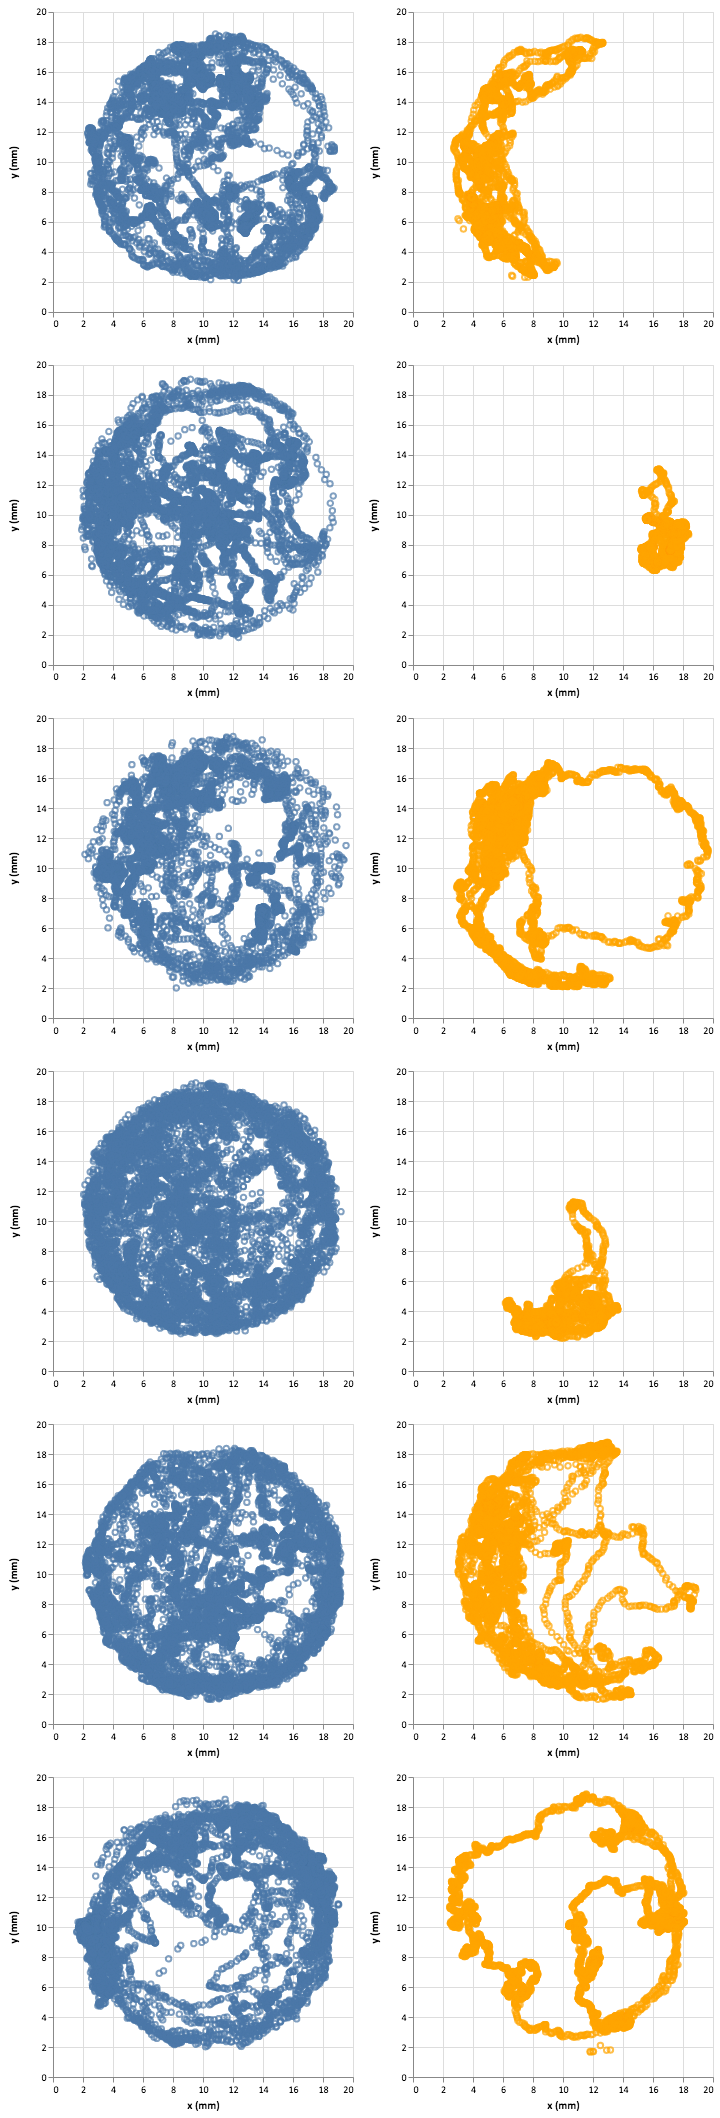

In [17]:
print ( '         Ants placed with Dalotia Beetle               Ants placed with Sceptobius Beetle')
print ( '         _______________________________               __________________________________')

# Create charts for all the ants in the experiment and make ants placed with the Dalotia rove beetle have blue points on their plots and ants placed with the 
# Sceptobius rove beetle have orange points on their plots
part_0_chart = alt.Chart(part_0, height=300, width=300).mark_point().encode(alt.X('x (mm)', scale=alt.Scale(domain=[0,20])), alt.Y('y (mm)', scale=alt.Scale(domain=[0,20])))
part_1_chart = alt.Chart(part_1, height=300, width=300).mark_point().encode(alt.X('x (mm)', scale=alt.Scale(domain=[0,20])), alt.Y('y (mm)', scale=alt.Scale(domain=[0,20])))
part_2_chart = alt.Chart(part_2, height=300, width=300).mark_point().encode(alt.X('x (mm)', scale=alt.Scale(domain=[0,20])), alt.Y('y (mm)', scale=alt.Scale(domain=[0,20])))
part_3_chart = alt.Chart(part_3, height=300, width=300).mark_point().encode(alt.X('x (mm)', scale=alt.Scale(domain=[0,20])), alt.Y('y (mm)', scale=alt.Scale(domain=[0,20])))
part_4_chart = alt.Chart(part_4, height=300, width=300).mark_point().encode(alt.X('x (mm)', scale=alt.Scale(domain=[0,20])), alt.Y('y (mm)', scale=alt.Scale(domain=[0,20])))
part_5_chart = alt.Chart(part_5, height=300, width=300).mark_point().encode(alt.X('x (mm)', scale=alt.Scale(domain=[0,20])), alt.Y('y (mm)', scale=alt.Scale(domain=[0,20])))
part_6_chart = alt.Chart(part_6, height=300, width=300).mark_point(color = 'orange').encode(alt.X('x (mm)', scale=alt.Scale(domain=[0,20])), alt.Y('y (mm)', scale=alt.Scale(domain=[0,20])))
part_7_chart = alt.Chart(part_7, height=300, width=300).mark_point(color = 'orange').encode(alt.X('x (mm)', scale=alt.Scale(domain=[0,20])), alt.Y('y (mm)', scale=alt.Scale(domain=[0,20])))
part_8_chart = alt.Chart(part_8, height=300, width=300).mark_point(color = 'orange').encode(alt.X('x (mm)', scale=alt.Scale(domain=[0,20])), alt.Y('y (mm)', scale=alt.Scale(domain=[0,20])))
part_9_chart = alt.Chart(part_9, height=300, width=300).mark_point(color = 'orange').encode(alt.X('x (mm)', scale=alt.Scale(domain=[0,20])), alt.Y('y (mm)', scale=alt.Scale(domain=[0,20])))
part_10_chart = alt.Chart(part_10, height=300, width=300).mark_point(color = 'orange').encode(alt.X('x (mm)', scale=alt.Scale(domain=[0,20])), alt.Y('y (mm)', scale=alt.Scale(domain=[0,20])))
part_11_chart = alt.Chart(part_11, height=300, width=300).mark_point(color = 'orange').encode(alt.X('x (mm)', scale=alt.Scale(domain=[0,20])), alt.Y('y (mm)', scale=alt.Scale(domain=[0,20])))
# Display the charts with the ants with the Dalotia beetle on the left and the charts with the ants placed with the Sceptobius beetle on the right 
part_0_chart & part_1_chart & part_2_chart & part_3_chart & part_4_chart & part_5_chart | part_6_chart & part_7_chart & part_8_chart & part_9_chart & part_10_chart & part_11_chart

The above plots display the position of the ants at each recorded time frame in the experiment, which is represented by a point on the chart. The charts on the left are of the ants that were placed with the Dalotia rove beetle (IDs 0-5) and the charts on the right are of the ants that were placed with the Sceptobius rove beetle (IDs 6-11). Also the upper most chart on the left side is of the ant with an id of 0 and then the plot below it is of the ant with id of 1. This pattern continues until the bottom left plot, which is of the ant with id 5. The right side follows the same principle of the id increasing by one for each plot below but the uppermost plot on the right will be of the ant of id 6 and the bottommost plot on the right will be of the ant with id 11.

 # Problem 1.2.c

Looking at the graphs of the ant with Dalotia versus Sceptobius rove beetles over the same number of time frames, it is clear that the ants with the Dalotia beetles moved around a lot more and were more active than the ants placed with the Sceptobius beetles, as the plots of the ants with the Sceptobius beetles had sparser and more spread out points in the arena.

# Problem 1.3.a

Given a joint distribution, marginalization refers to summing out the probability of a random variable by computing distributions over subsets of the variables. 

This is useful when you want to compute the probability of a random variable X but you don’t have its probability distribution P(X = x), and instead have a joint probability 
distribution over that variable X and other random variables. You basically sum all the probability values of where X = x occurs with all possible values of the other random
variables.

# Problem 1.3.b

$$
P(\theta_1 | y)
= \sum_{\theta_2} P(\theta_1, \theta_2 | y)
= \sum_{\theta_2} \frac{P(y | \theta_1, \theta_2) P(\theta_1, \theta_2)}{P(y)}
$$

First, the expression can be rewritten using marginalization as described in the above part, where a parameter is eliminated by summing. Then, this resulting expression can be rewritten using the given Bayes's theorem of two parameters.